### Import Data and Exploration 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import os
import sys

In [2]:
# Setting the working path

os.chdir('../') # remove the last directory
path = os.getcwd()
print(path)

/home/joao_victor/netflix-recommendation-app


In [3]:
# Reading credits table

df_credits = pd.read_csv(path + '/data/input/credits.csv')
df_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [5]:
# Reading titles table

df_titles = pd.read_csv(path + '/data/input/titles.csv')
df_titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [6]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [7]:
# # Aggregate name column by movie id separeting by comma

# df_credits_agg = df_credits.groupby('id')['name'].agg(','.join).to_frame().reset_index()
# df_credits_agg

In [8]:
# Validate the aggregation

# df_credits.loc[df_credits['id'] == 'ts9794']

In [9]:
# Merge actors name column from df_titles in df_credits to have a concatenate column with all actors by movie

# df_merged_titles = pd.merge(df_titles, df_credits_agg, left_on = "id", right_on = "id")
# df_merged_titles

#### Nulls Handling

In [10]:
# Checking for 'null' values

df_titles.isnull().sum().sort_values(ascending=False) 

seasons                 3759
age_certification       2610
imdb_votes               539
imdb_score               523
imdb_id                  444
tmdb_score               318
tmdb_popularity           94
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64

In [11]:
# Checkin if all rows with 'type' == 'MOVIE' have just null values in seasons column

df_titles.loc[df_titles['type']=='MOVIE']['seasons'].unique()

# As seen all null values in season column are from movies, so we'll replace null values for zeros

array([nan])

In [12]:
# Define function to replace null values

def replace_nulls(df:pd.DataFrame, columns:list, value:float) -> pd.DataFrame:
    """
    Substitute null values for specified value in a dataframe column(s) inplace.

    Args:
        df (pd.DataFrame): Pandas Dataframe
        columns (list): Column(s) for transformation
        value (float): Value to replace 

    Returns:
        pd.DataFrame: Pandas Dataframe
    """    
    for i in columns:
        df[i].fillna(value, inplace = True)
    return df

replace_nulls(df_titles, ['seasons'], 0)
replace_nulls(df_titles, ['age_certification'], 'no_certification')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,no_certification,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,no_certification,74,"['music', 'documentation']",[],0.0,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,no_certification,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,no_certification,116,"['action', 'thriller']",[],0.0,tt10168094,6.2,9.0,2.186,NaN


In [13]:
# 'tmdb_score' and 'imdb_score' columns have differents rows with null values

df_titles[['tmdb_score', 'imdb_score']].isnull().sum()

# So we can substitute these null values for the column mean

tmdb_score    318
imdb_score    523
dtype: int64

/home/joao_victor/anaconda3/envs/netflix-app/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


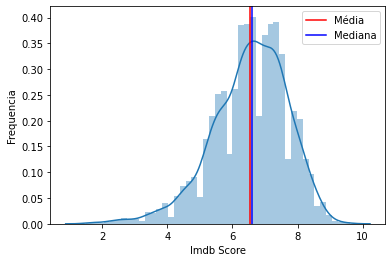

In [14]:
# Check for normal distribution of the imdb_score column

sns.distplot(df_titles['imdb_score'])
plt.xlabel("Imdb Score")
plt.ylabel("Frequencia")

plt.axvline(x = df_titles['imdb_score'].mean(),color='red', label = 'Média') # média
plt.axvline(x = df_titles['imdb_score'].median(),color='blue', label = 'Mediana') # mediana

plt.legend()
plt.show()

/home/joao_victor/anaconda3/envs/netflix-app/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


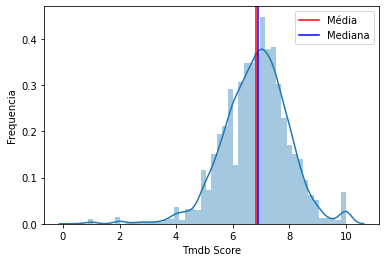

In [15]:
# Check for normal distribution of the tmdb_score column

sns.distplot(df_titles['tmdb_score'])
plt.xlabel("Tmdb Score")
plt.ylabel("Frequencia")

plt.axvline(x = df_titles['tmdb_score'].mean(),color='red', label = 'Média') # média
plt.axvline(x = df_titles['tmdb_score'].median(),color='blue', label = 'Mediana') # mediana

plt.legend()
plt.show()

In [16]:
# We can algo use describe function to see the mean and median values

df_titles['imdb_score'].describe()

count    5283.000000
mean        6.533447
std         1.160932
min         1.500000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.600000
Name: imdb_score, dtype: float64

In [17]:
# These columns are on the same number scale (same min and max values), thus we can create a column for universal score, using tmdb score whenever there is no imdb score

#df_titles[['tmdb_score', 'imdb_score']].describe()

In [18]:
# Check the % of null values in the dataset.

df_missing = df_titles[['tmdb_score', 'imdb_score']]
percent_missing = df_titles.isnull().sum() * 100 / len(df_titles)
missing_value_df = pd.DataFrame({'column_name': df_titles.columns,
                                 'percent_missing': percent_missing})
missing_value_df                                 

,column_name,percent_missing
id,id,0.000000
title,title,0.017224
type,type,0.000000
description,description,0.310024
release_year,release_year,0.000000
age_certification,age_certification,0.000000
runtime,runtime,0.000000
genres,genres,0.000000
production_countries,production_countries,0.000000
seasons,seasons,0.000000


Use "substitute with the mean" strategy 

In [19]:
# Define function to replace null values for column mean

def null_for_mean(df:pd.DataFrame, columns:list) -> pd.DataFrame: 
    """
    Substitute null values for the specified column mean. 

    Args:
        df (pd.DataFrame): Pandas Dataframe
        columns (list): column(s) for transformation

    Returns:
        pd.DataFrame: Pandas Dataframe
    """
    for i in columns:
        df[i].fillna(df[i].mean(), inplace = True)
    return df 
null_for_mean(df_titles, ['imdb_score', 'tmdb_score']) # replace null for mean in 'imdb_score', 'tmdb_score' columns

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,6.533447,NaN,0.600,6.818039
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.300000,795222.0,27.612,8.200000
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.200000,530877.0,18.216,7.800000
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.000000,392419.0,17.505,7.800000
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.100000,391942.0,95.337,7.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,no_certification,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.900000,39.0,0.966,6.818039
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,no_certification,74,"['music', 'documentation']",[],0.0,NaN,6.533447,NaN,1.036,8.500000
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,no_certification,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.500000,32.0,0.709,6.818039
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,no_certification,116,"['action', 'thriller']",[],0.0,tt10168094,6.200000,9.0,2.186,6.818039


In [20]:
# Validate change of null replace to mean

df_titles[['tmdb_score', 'imdb_score']].isnull().sum()

tmdb_score    0
imdb_score    0
dtype: int64

In [21]:
# Checkin columns with null values still

df_titles.isnull().sum().sort_values(ascending = False)

imdb_votes              539
imdb_id                 444
tmdb_popularity          94
description              18
title                     1
id                        0
type                      0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score                0
tmdb_score                0
dtype: int64

In [22]:
# Remove rows with null values in description, title and tmdb_popularity columns

df_titles.dropna(0, subset = ['description', 'title', 'tmdb_popularity'], inplace = True)

/tmp/ipykernel_1225/1265854531.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_titles.dropna(0, subset = ['description', 'title', 'tmdb_popularity'], inplace = True)


In [23]:
df_titles.isnull().sum().sort_values(ascending = False)

imdb_votes              516
imdb_id                 431
id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

In [24]:
# Extracting the first value from genres array

genres={}
def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")
  
  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]
  
  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'


df_titles['genres_transformed'] = df_titles['genres'].map(transform_genres) 
df_titles['production_countries_transformed'] = df_titles['production_countries'].map(transform_genres)

  # another way
  # import ast
  # df_titles['new_col'] = df_titles['genres'].apply(ast.literal_eval).str[0]
  # df_titles.head()


#### Exploratory Analysis

As we will create a recommendation app after the exploration, so we have to analyze and look for the most promissing faetures

In [27]:
df_titles.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genres_transformed,production_countries_transformed
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,6.533447,NaN,0.600,6.818039,documentation,US
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.300000,795222.0,27.612,8.200000,crime,US
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.200000,530877.0,18.216,7.800000,comedy,GB


<AxesSubplot:>

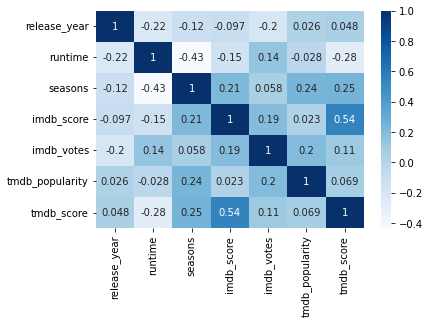

In [26]:
# Check correlation 

sns.heatmap(df_titles.corr(), cmap = 'Blues', annot = True)

Analyzing Age Certification

- **G:** General audiences – All ages admitted.
- **PG:** Parental Guidance Suggested.
- **PG-13:** Parents Strongly Cautioned.
- **TV-MA:** Adults Only.
- **TV-G:** Suitable for All Ages.
- **TV-Y:** Appropriate for All Children.
- **TV-Y7:** Designed for Children Age 7 and Above.
- **TV-14** Parental Guidance Suggested for Children Under 14 Year of Age.
- **TV-PG:** Parental Guidance Suggested.
- **NC-17** Adults Only.
- **R** Restricted. 

/tmp/ipykernel_1225/3058560176.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df_titles.groupby(['age_certification'])['imdb_score', 'tmdb_score'].mean().reset_index()


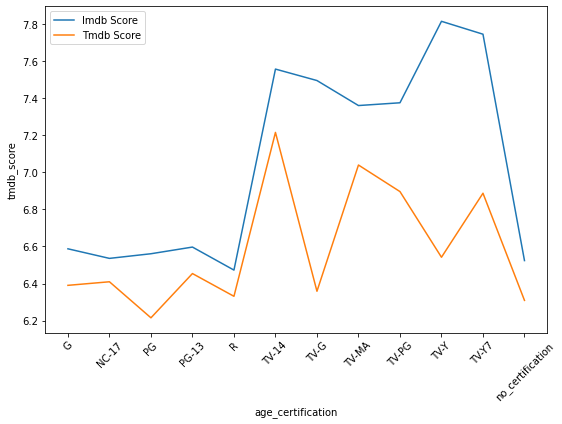

In [51]:
data = df_titles.groupby(['age_certification'])['imdb_score', 'tmdb_score'].mean().reset_index()
plt.figure(figsize = (9,6)) 

sns.lineplot(data = data, x = 'age_certification', y = 'tmdb_score')  
sns.lineplot(data = data, x = 'age_certification', y = 'imdb_score')  

#plt.grid()
plt.legend(labels = ['Imdb Score','Tmdb Score'])
plt.xticks(rotation=45)
plt.show()

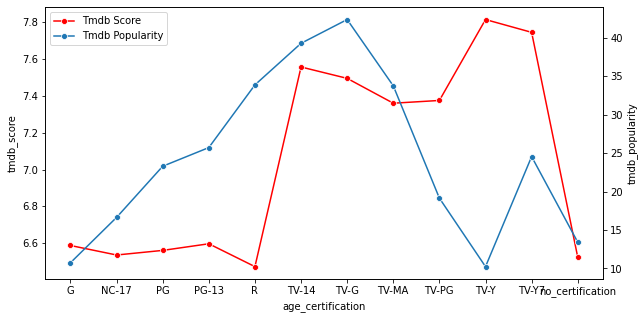

In [155]:
fig, ax1 = plt.subplots(figsize = (10,5))

data_score = df_titles.groupby(['age_certification'])['tmdb_score'].mean().reset_index()
data_popularity = df_titles.groupby(['age_certification'])['tmdb_popularity'].mean().reset_index()

ax1 = sns.lineplot(data = data_score, x = 'age_certification', y = 'tmdb_score', color = 'red', ax = ax1, label = 'Tmdb Score', marker = 'o')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data = data_popularity, x = 'age_certification', y = 'tmdb_popularity', ax = ax2, label = 'Tmdb Popularity', marker = 'o')

# Show two lines legends

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)
ax2.get_legend().remove()

plt.xticks(rotation=90)
plt.show()